# Régression Simple

### import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('reg_simple.csv')
#initilisation du dataframe

In [5]:
n = len(df)
x = []
for i in range (len(df)) :
	x.append([df['heure_rev'][i], 1])
x = np.asarray(x)
y = np.asarray(df['note'])
theta = np.random.random(2)
#création des matrices x, y et theta pour l'équation y = x@theta

In [6]:
def model (X, theta) :
	return X@(theta)
#création de la fonction donnant le modèle, simple multiplication matricielle entre x et theta

In [7]:
def func_cout(X, Y, theta) :
	 cout = 0
	 n = len(X)
	 cout = (X@(theta)-Y)@((X@(theta)-Y))/(2*n) 
	 return cout
#fonction de calcul du coût

In [8]:
def gradient (X, Y, theta) :
	g= []
	n = len(X)
	g = X.transpose()@((X@(theta)-Y))*(1/n) 
	return g
#calcul du gradient

In [9]:
def descente_gradient(X, Y, theta, alpha, nb_iter) : 
	#alpha et nb_iter sont des valeurs arbitraires, plus alpha est petit plus on sera précis et nb_iter permet de s'approcher de plus en plus de Y
	g = gradient(X, Y, theta)
	g = np.asarray(g)
	n = len(X)
	nT = theta
	cout_tab = []
	j = 0
	cout_iter = 0
	while j < nb_iter :
		nT -= g*alpha
		cout_iter = func_cout(X, Y, nT)
		cout_tab.append(cout_iter)
		j+=1
		g = gradient(X, Y, nT)
	return nT, cout_tab

#fonction de descente du gradient qui renvoi nT, le nouveau theta après la descente et une liste contenant le coût de chaque itération


In [10]:
def coefficient_determination (X, Y, theta) :
	n = len(X)
	moy_y = 0
	s_moy = 0
	s_fx = 0
	for i in range (n) :
		moy_y = Y[i] + moy_y
	moy_y = moy_y/n
	for i in range(n) :
		s_moy_y = (Y[i] - moy_y) ** 2
		s_fx = (Y[i] - (theta[0] * X[i][0] - theta[1])) ** 2
	r_sqrd = 1 - s_fx / s_moy_y
	return r_sqrd

#fonction de calcul du coefficient de détermination pour évaluer une régression linéaire simple

### Execution de la régression simple

cout du modele :  9.887752944550916 


coefficient de détermination :  0.9997313028221813


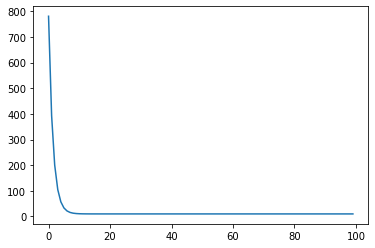

In [11]:
#On effectue la descente du gradient avec les valeurs de x, y et theta de départ
grad_desc = descente_gradient(x, y, theta, 0.001, 100)
#on récupère la liste du coût de chaque itération dans cout
cout = np.asarray(grad_desc[1])
#nouv_theta est la meilleur valeur de theta ( le couple (a,b)) après la descente du gradient
nouv_theta = grad_desc[0] 

#F est le modèle obtenu grâce à la régression
F = model(x, nouv_theta)

print('cout du modele : ', func_cout(x, y, nouv_theta),'\n\n')
#affiche le cout de la der,ière itération
print('coefficient de détermination : ', coefficient_determination(x, y, nouv_theta))
#affiche le cout en fonction des iterations
pltc = plt.plot(cout)
plt.show()

# Régression multiple

In [12]:
from sklearn.metrics import mean_squared_error


df = pd.read_csv('boston_house_prices.csv')

list_corr = []
for i in df :
	val = df[i].corr(df['MEDV'], method='pearson')
	if (val > 0.6 or val < -0.6) :
		list_corr.append(i)
#On détermine quelle colonnes de df sont les plus intéressantes à prendre pour éviter un overflow lors des calculs matriciels
df[list_corr] = df[list_corr].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#On normalise les valeurs
n = len(df)
x = []
#on insert les colonnes voulues dans un liste, que l'on transpose ensuite pour avoir la bonne forme de matrice 
for i in list_corr :
	if i != 'MEDV' :
		x.append(df[i])
x = np.array(x).transpose()
x=np.insert(x, 2, 1, axis=1)
#On insert la colonne de 1 dans la matrice

y = df['MEDV'].values
theta = np.random.random(len(list_corr))
#on affecte y et theta

## Execution de la régression multiple

 data
 [0.42222222 0.36888889 0.66       0.63111111 0.69333333 0.52666667
 0.39777778 0.49111111 0.25555556 0.30888889 0.22222222 0.30888889
 0.37111111 0.34222222 0.29333333 0.33111111 0.40222222 0.27777778
 0.33777778 0.29333333 0.19111111 0.32444444 0.22666667 0.21111111
 0.23555556 0.19777778 0.25777778 0.21777778 0.29777778 0.35555556
 0.17111111 0.21111111 0.18222222 0.18       0.18888889 0.30888889
 0.33333333 0.35555556 0.43777778 0.57333333 0.66444444 0.48
 0.45111111 0.43777778 0.36       0.31777778 0.33333333 0.25777778
 0.20888889 0.32       0.32666667 0.34444444 0.44444444 0.40888889
 0.30888889 0.67555556 0.43777778 0.59111111 0.40666667 0.32444444
 0.30444444 0.24444444 0.38222222 0.44444444 0.62222222 0.41111111
 0.32       0.37777778 0.27555556 0.35333333 0.42666667 0.37111111
 0.39555556 0.40888889 0.42444444 0.36444444 0.33333333 0.35111111
 0.36       0.34       0.51111111 0.42       0.44       0.39777778
 0.42       0.48       0.38888889 0.38222222 0.41333333 0.526

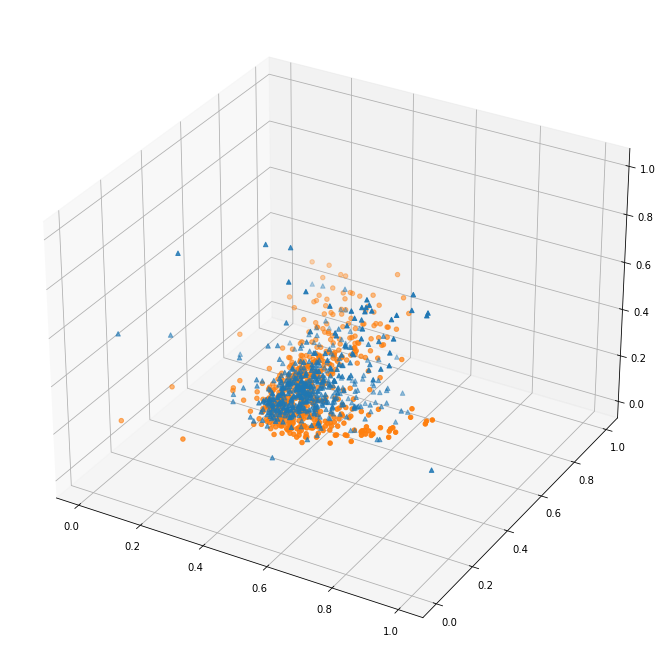

In [13]:
#fonctionnement similaire à la régression simple, en utilisant les mêmes fonctions

grad_desc = descente_gradient(x, y, theta, 0.001, 10000)
cout = np.asarray(grad_desc[1])
nouv_theta = grad_desc[0] 
#F est en 2 dimension cette fois
F = model(x, nouv_theta)
#affichage sous forme de nuages de points des données et du modèle (les données en bleu, le modèle en orange) 
xs = df['RM']
ys = df['LSTAT']
zs = df['MEDV']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker='^')
ax.scatter(xs, ys, F, marker='o')

#calcul de la mean squared error en utilisant scikit-learn
my_sqrd=mean_squared_error(y, F)
print(' data\n', y)
print('modèle\n', F)
print("MSE =", my_sqrd )

#affichange des extrma du modèle et des données pour une meilleur lisibilité 
print('min modele ', F.min(), 'max modele', F.max())
print('min data ', y.min(), 'max data', y.max())
#plt.plot(F)
plt.show()



# Régression polynomiale

In [20]:
#code pour executer la regression sur le fichier Position_Salaries.csv

df = pd.read_csv('Position_Salaries.csv')

colonne = ['Level', 'Salary']
df[colonne] = df[colonne].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

deg = 3
x = []
for i in range (deg+1) :
	x.append(df['Level']**i)

x = np.array(x).transpose()
x = np.array(x, dtype=np.float64)
y = df['Salary'].values
y = np.array(y, dtype=np.float64)
theta = np.random.random(deg + 1)
theta = np.array(theta, dtype=np.float64)

In [14]:
#code pour executer la régression sur le fichier qualite-vin-rouge.csv

df = pd.read_csv('qualite-vin-rouge.csv')

list_corr = []
for i in df :
	val = df[i].corr(df['qualité'], method='pearson')
	if (val > 0.4 or val < -0.4) :
		list_corr.append(i)

df[list_corr] = df[list_corr].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

deg = 3
x = []
for i in range (deg+1) :
	x.append(df['alcool']**i)

x = np.array(x).transpose()
x = np.array(x, dtype=np.float64)
y = df['qualité'].values
y = np.array(y, dtype=np.float64)
theta = np.random.random(deg + 1)
theta = np.array(theta, dtype=np.float64)

## Execution de la régression polynomiale

resultat = 0.02252703461002281
min modele  0.3448179829122843 max modele 1.2823532542810927
min data  0.0 max data 1.0


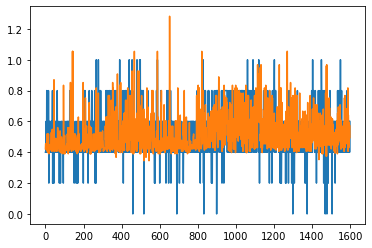

In [15]:
grad_desc = descente_gradient(x, y, theta, 0.001, 10000)
cout = np.asarray(grad_desc[1])
nouv_theta = grad_desc[0] 

F = model(x, nouv_theta)

my_sqrd=mean_squared_error(y, F)

print("resultat =", my_sqrd )

print('min modele ', F.min(), 'max modele', F.max())

print('min data ', y.min(), 'max data', y.max())
plt.plot(y)
plt.plot(F)
plt.show()

